## Step 1 – Import Packages

In [18]:
#Importing Pacakages

import pandas as pd #Data Processing
import numpy as np  #for array
import matplotlib.colors as mcolors # for histogram colors

import matplotlib.pyplot as plt #Data Visualization
#from matplotlib import gridspec
import seaborn as sns 

from sklearn.model_selection import train_test_split #for spliting the data
from sklearn.preprocessing import StandardScaler # Standardization method
from sklearn.model_selection import KFold
KFold
from scipy.stats import skew # for checking data skewness
from sklearn.preprocessing import PowerTransformer # Importing PowerTransformer for mitigate data skewness

from imblearn.under_sampling import RandomUnderSampler # Importing undersampler library for random undersampling
from collections import Counter

#from sklearn.model_selection import GridSearchCV
#from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore') #for ignore warnings



# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

## Step 2 – Reading and Exploring the Data

#### I will read the data from CSV file using pandas, and then print the  first five rows by head() and last five rows of the dataset by tail() methods

In [19]:
#Import the dataset

df = pd.read_csv('creditcard.csv')

df.head().append(df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Insight of result
#### We can see from the result that time column is a seconds to define the time between the current and first transactions.Amount column define the amount of the transaction. Class 0 indicates Normal Transaction and 1 indicates Abnormal Transactions. 'Time' and 'Amount' are the only features that are not transformed to PCA.

### 2.1 Exploring the Data

#### In follwing code I have a look at the number of Abnormal and Normal cases in dataset as well as  also calculate the percentage of abnormal cases and normal cases in the total number of recorded transactions. 


In [20]:
#finding the length of the dataset
cases = len(df)
print("Total Number of Transactions is : ",cases,"\n")

#counting the number of abnormal and normal transactions
abnormal_count = len(df[df.Class == 1])
normal_count = len(df[df.Class == 0])
print("Total Number of Abnoramal Transactions is : ",abnormal_count)
print("Total Number of Normal Transactions is : ",normal_count,"\n")

#calculating the percentage of abnormal and normal transactions
abnormal_percentage = round(abnormal_count/cases*100,2)
normal_percentage = round(normal_count/cases*100,2)
print("Percentage Abnormal Transaction is : ",abnormal_percentage)
print("Percentage of Normal Transaction is : ",normal_percentage)

Total Number of Transactions is :  284807 

Total Number of Abnoramal Transactions is :  492
Total Number of Normal Transactions is :  284315 

Percentage Abnormal Transaction is :  0.17
Percentage of Normal Transaction is :  99.83


### 2.2 Summary of dataset

#### The percentile, mean, and standard deviation of the numerical values of the Series or DataFrame are calculated using the describe() method. It examines mixed data type DataFrame column sets as well as numeric and object series.

In [21]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 2.3 Preprocessing the Dataset

#### Preprocessing the data is a crucial step in the analysis because it helps to get rid of duplicates and outliers. Additionally, scaling the columns on a broad basis is a widely accepted technique that promotes faster convergence and produces better outcomes.

#### In followind line of code I have Checking for null values in dataset

In [22]:
df.isnull().values.any()

False

### Insight of Result
#### I have observe that none of the columns have any missing data. As a result, there is no issue with null values across the dataset.

#### In following line of code I have checking about the data duplicancy.

In [23]:
sum(df.duplicated())

1081

### Insight of Result 
#### The dataset has to be cleaned up because there are over 1081 duplicate rows. In order to eliminate the duplicates, use the following line of code:

In [24]:
df.drop_duplicates(inplace=True)

## Step 3 – Exploratory Data Visualization

#### When visualisations and images are employed, understanding is frequently much improved. Problems with machine learning are the same. Exploratory data visualisation is the process of visualising various parts of the information to better understand the data.

### Checking the frequncy of frauds and visualize it by barplot

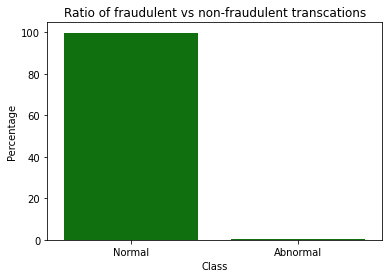

In [25]:
#The fraction of fraudulent vs non-fraudulent transactions is shown as a bar plot.
fraud = {'Class':['Normal', 'Abnormal'], 'Percentage':[normal_percentage, abnormal_percentage]} 
df_fraud = pd.DataFrame(fraud) 


sns.barplot(x='Class',y='Percentage', data=df_fraud, color='g')
plt.title('Ratio of fraudulent vs non-fraudulent transcations')
plt.show()


### Insight of result
#### There are just 492 abnormal incidents out of 284,807 samples, or 0.17 percent of all samples. As a result, I may conclude that the data I am working with is very unbalanced and must be treated with caution while modelling and assessing it. 

#### We are now investigating at the spread of the two designated characteristics which are "Time" and  "Amount" in the dataset is now examined.

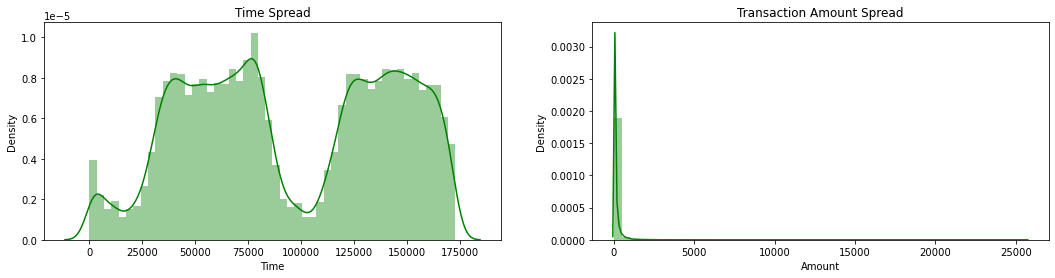

In [26]:
#consider the two characteristics "Amount" and "Time" and visualizing."
figure, ax = plt.subplots(1,2, figsize=(18,4))

sns.distplot(df['Time'], ax=ax[0], color='g')
ax[0].set_title("Time Spread")

sns.distplot(df['Amount'], ax=ax[1], color='g')
ax[1].set_title("Transaction Amount Spread")
plt.show()

#### Watch how the classes are distributed using normal and abnormal transaction

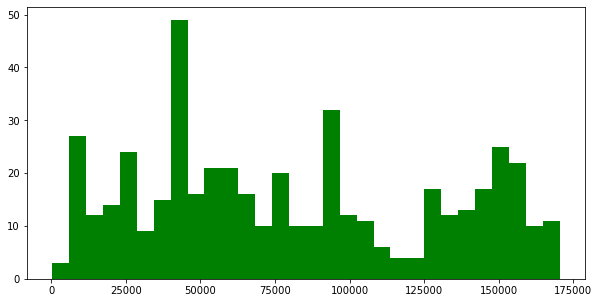

In [27]:
# Creating Normal dataframe
data_abnormal = df[df['Class'] == 1]
plt.figure(figsize=(10,5))
plt.hist(data_abnormal['Time'], label='abnormal', bins=30 , color='g')
plt.show()

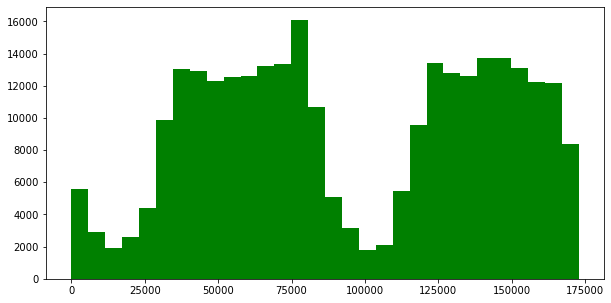

In [28]:
# Creating Normal dataframe
data_normal = df[df['Class'] == 0]
plt.figure(figsize=(10,5))
plt.hist(data_normal['Time'], label='normal', bins=30 , color='g')
plt.show()

#### Plotting histograms to understand the values of each variable is a good place to start. Using the code given below:

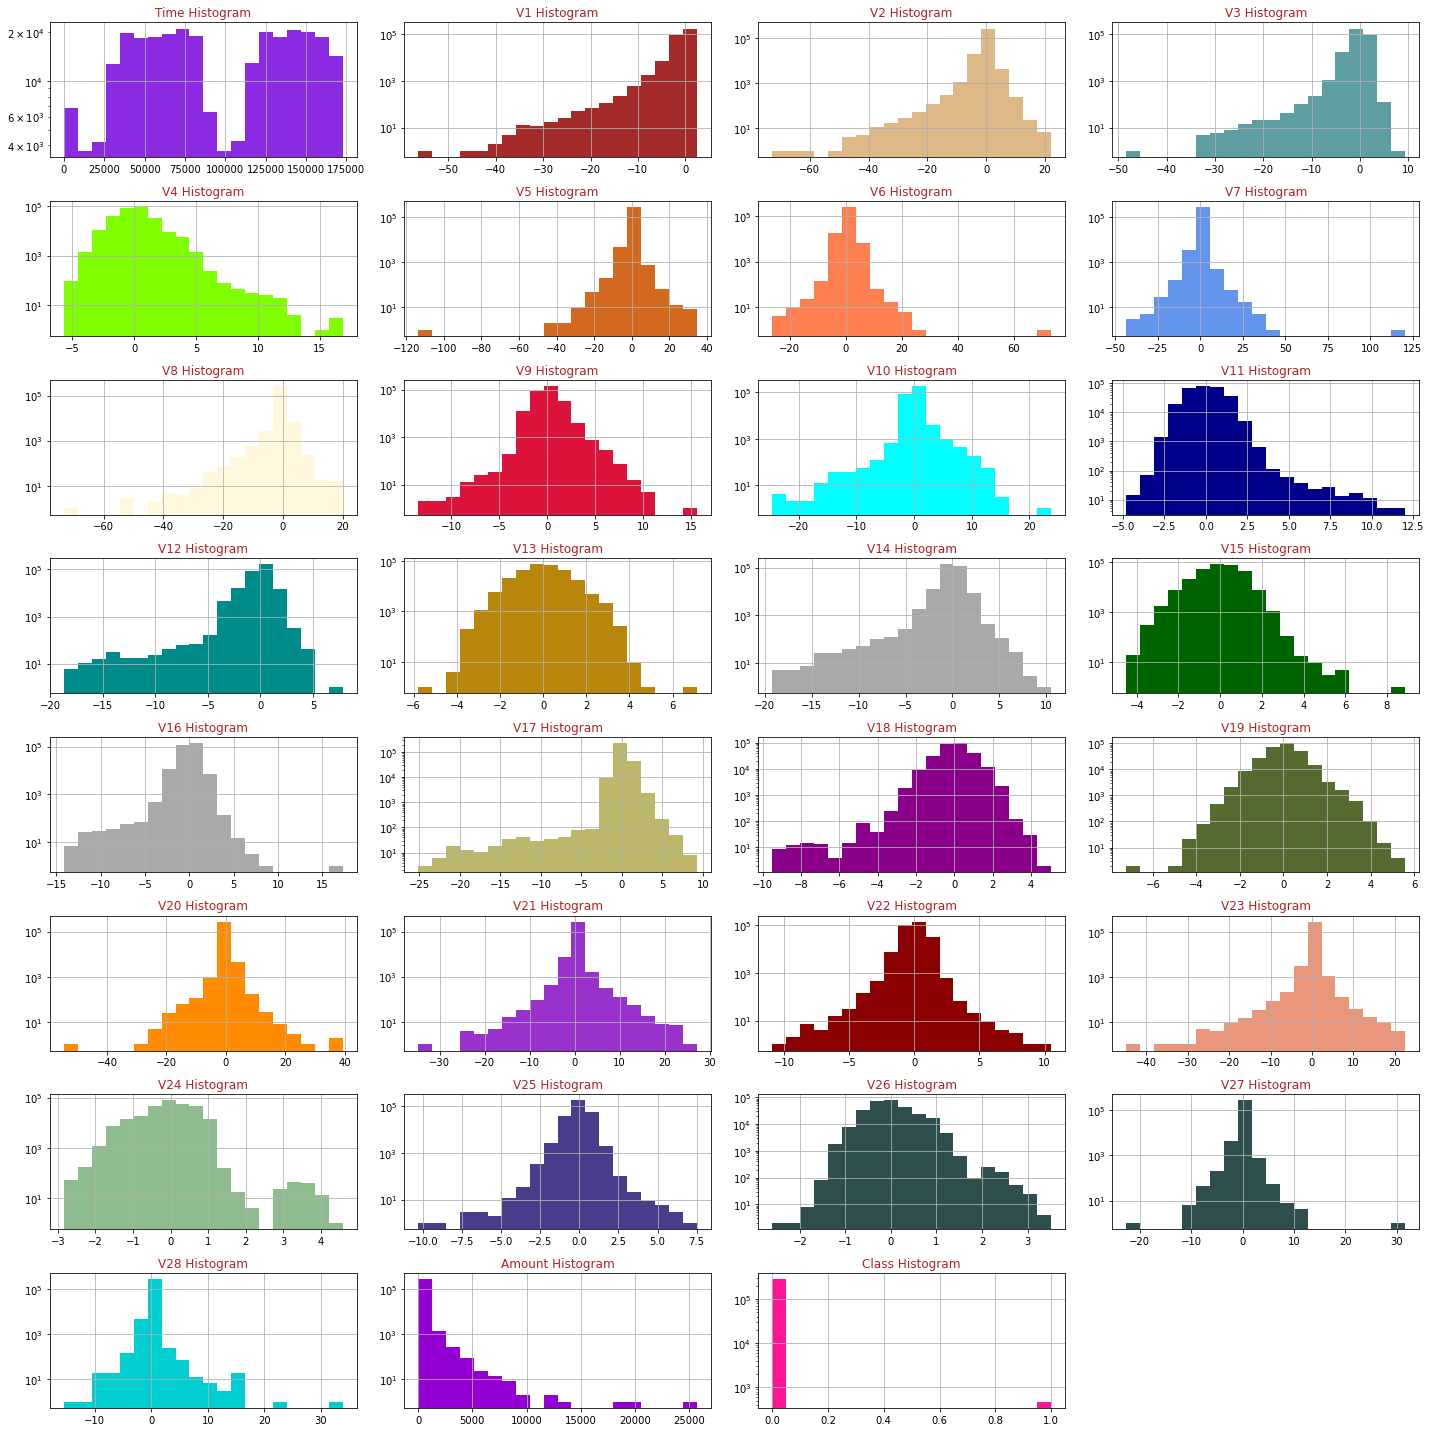

In [29]:

colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

#### It is also a common practice to observe the dependency of variables on each other by studying their correlation. A very interesting and meaningful visualization called Heatmap can be plotted that gives this very information. It can be plotted by using code given below:

 

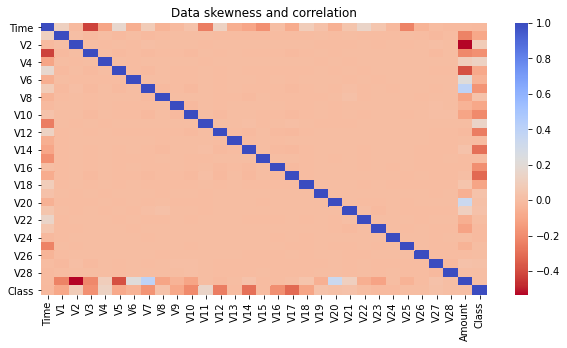

In [30]:
f,ax = plt.subplots(1, 1, figsize=(10, 5))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', ax=ax )
ax.set_title('Data skewness and correlation')
plt.show()


### Insight of result
#### With regard to Time, I have notice that there is no discernible trend for abnormal and normal transactions. As a result, I have remove the Time column in the following code.

In [31]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)


## Step 4 : Train - Test Split

#### In this step, the dataset columns may be divided into feature columns & targeted columns. As previously stated, the main column is the class column, and the rest is a feature. As a result, as follows

In [34]:


# Putting feature variables into X
X = df.drop(['Class'], axis=1)

# Putting target variable to y
y = df['Class']

# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### 4. 1 Feature Scaling

In [35]:


# # Instantiate the Scaler
scaler = StandardScaler()

# # Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train.head()

# from sklearn.preprocessing import StandardScaler
# df['norm_amount'] = StandardScaler().fit_transform(
# df['Amount'].values.reshape(-1,1))
# df = df.drop(['Amount'], axis=1)
# print(f"few values of Amount column after applying StandardScaler:- \n {df['norm_amount'][0:4]}")


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49578,-1.550810,0.731824,2.549028,2.733753,0.250049,2.870749,0.354236,0.007231,-0.037368,1.419594,...,-0.312468,0.005203,0.831394,0.117041,-0.935059,-0.665162,0.188614,-0.910417,-0.273559,0.008282
56032,-1.305339,1.059107,1.586936,1.650134,1.669107,-0.680811,0.717706,0.072364,-1.664982,-0.693306,...,0.117144,-0.101308,-0.557447,-0.121542,-0.058211,0.390341,-0.219061,0.017214,0.108434,-0.324396
272370,-1.498534,1.268183,-1.360645,-1.310035,2.744320,3.666680,0.234403,0.502133,0.313536,1.060169,...,-0.053535,-0.067233,-0.546292,0.212806,0.703104,-0.805702,0.195482,-1.110255,0.304176,-0.341687
13917,1.198304,0.378397,0.541355,0.835317,-0.386506,-0.829408,-0.137542,-0.121206,1.122380,-0.470237,...,-0.149218,-0.377945,-0.909802,0.158471,0.420259,0.117492,0.027304,-0.057095,0.015486,-0.340489
132654,-0.833194,0.769305,0.865990,-2.250385,1.018626,0.090372,0.751702,0.149752,-0.268840,-0.716749,...,-0.038624,-0.020569,-0.044707,-0.211529,-1.094250,-0.174526,0.678921,0.117100,0.158518,-0.351151


In [36]:
# # Transform the test set
# X_test['Amount'] = scaler.transform(X_test[['Amount']])
# X_test.head()

## Features and target creations
X = df.drop(['Class'], axis=1)
y = df[['Class']]


### 4.2 Checking the Skewness

In [37]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

V1:-3.2283640396492594


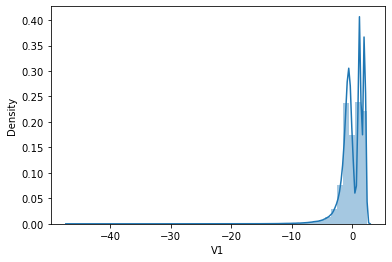

V2:-4.309993801710392


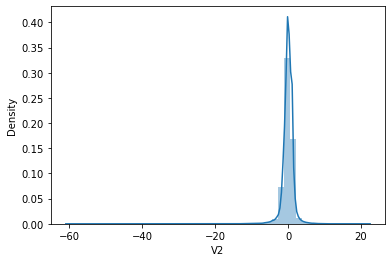

V3:-2.1573983260210112


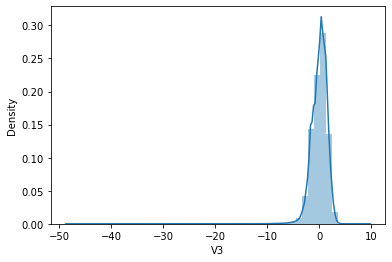

V4:0.6573756459708303


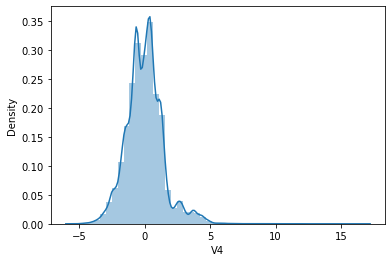

V5:-3.0053630567871155


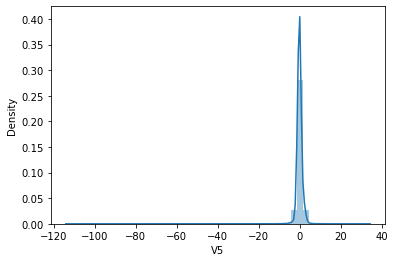

V6:1.994192158318613


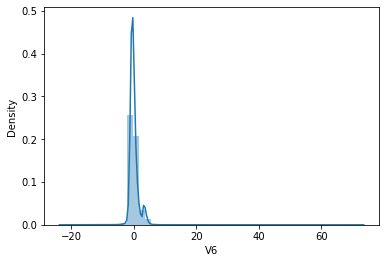

V7:3.728190036128916


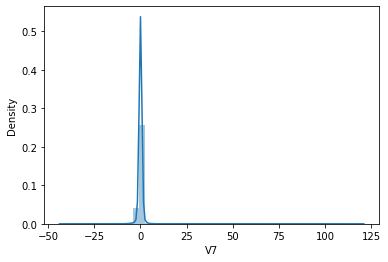

V8:-7.966799392622033


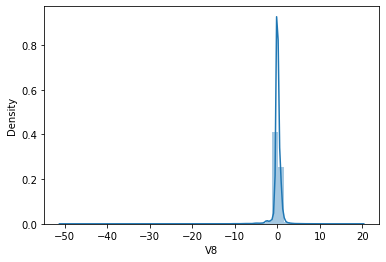

V9:0.5351362580119362


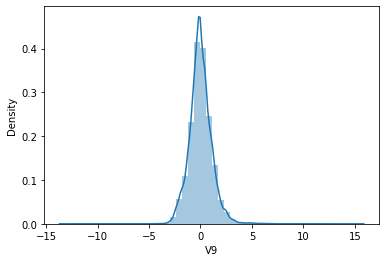

V10:1.2787662481668867


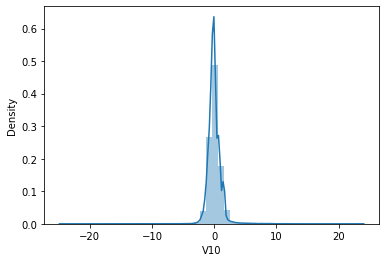

V11:0.32089103591247464


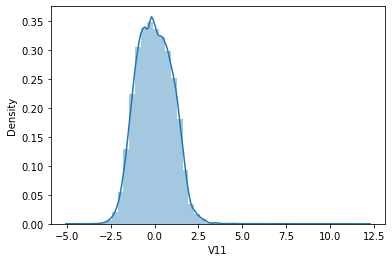

V12:-2.065033044365599


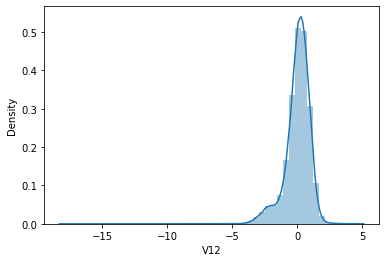

V13:0.06582790570046877


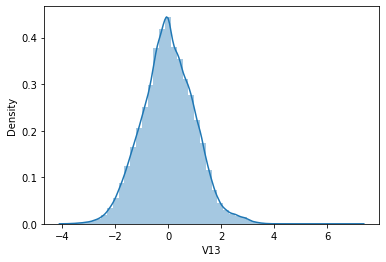

V14:-1.7883763798032464


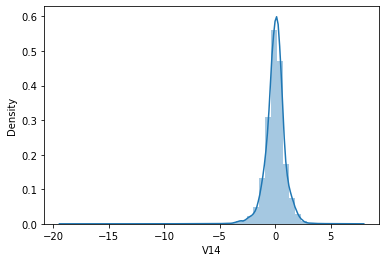

V15:-0.30929138241596066


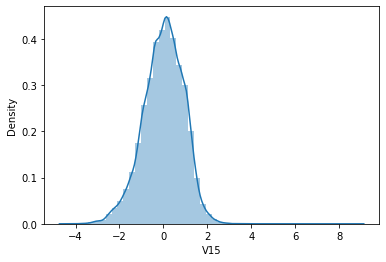

V16:-0.958258027031965


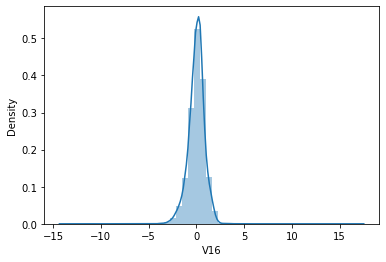

V17:-3.4044864196195266


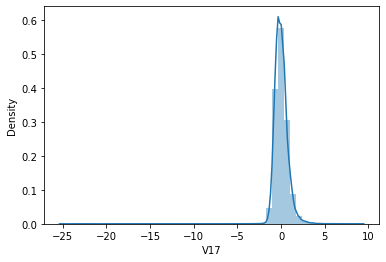

V18:-0.23378424494859276


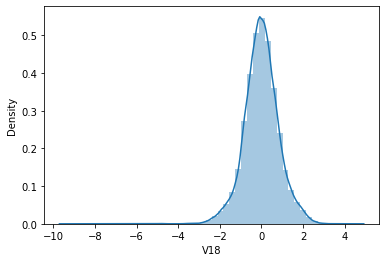

V19:0.10985064430196771


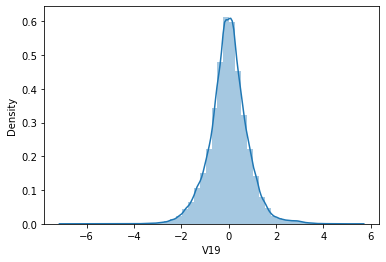

V20:-2.6584400648133375


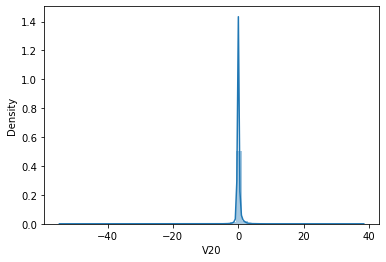

V21:3.067999120047116


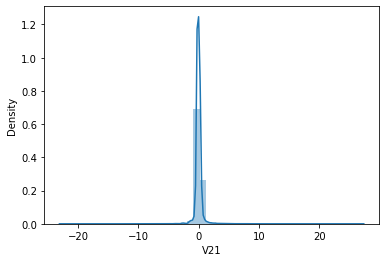

V22:-0.17327260339285314


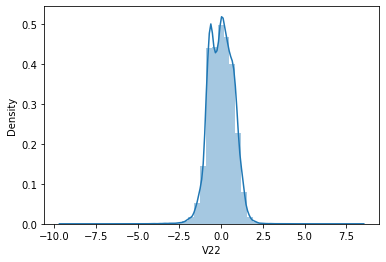

V23:-5.91946211287973


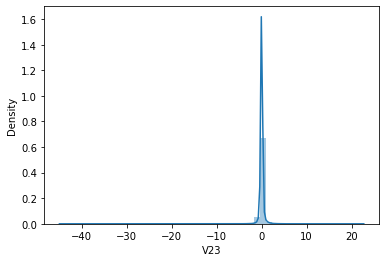

V24:-0.5574274598787159


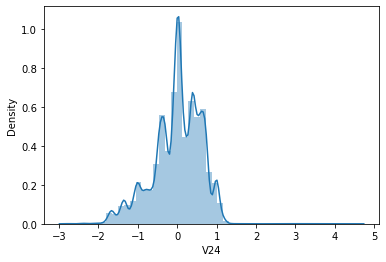

V25:-0.42856250711866284


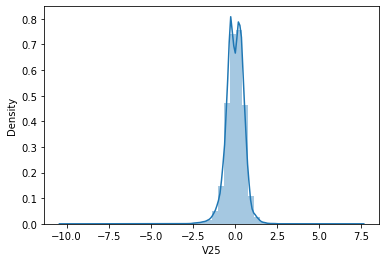

V26:0.5825281594976933


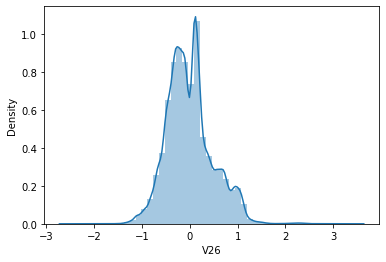

V27:-0.6881748898149483


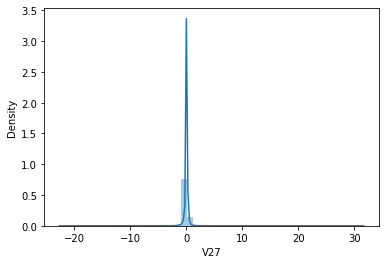

V28:8.831847670969687


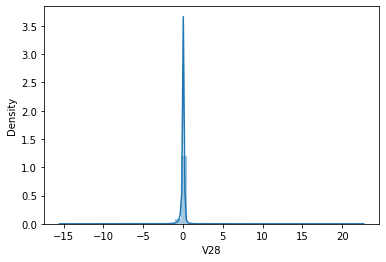

Amount:16.65854354110964


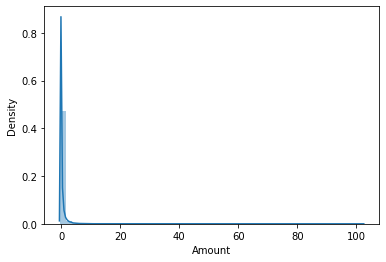

In [38]:
# Plotting the distribution of the variables (skewness) of all the columns
# k=0
# plt.figure(figsize=(17,28))
# for col in cols :    
#     k=k+1
#     plt.subplot(6, 5,k)    
#     sns.distplot(X_train[col])
#     plt.title(col+' : '+str(X_train[col].skew()))

for col in cols:
    
    print(col+':'+str(skew(X_train[col])))
    plt.figure()
    
    sns.distplot(X_train[col])
    plt.show()
    

### 4.3 Mitigate skweness with PowerTransformer

V1:-0.21788915172751053


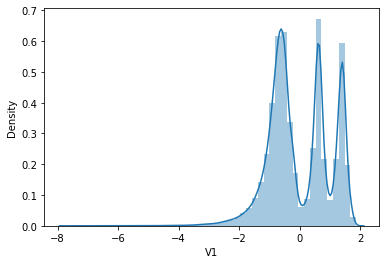

V2:0.3533845618444585


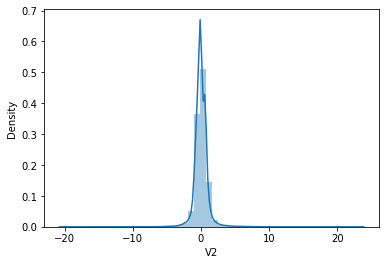

V3:-0.07909730932191518


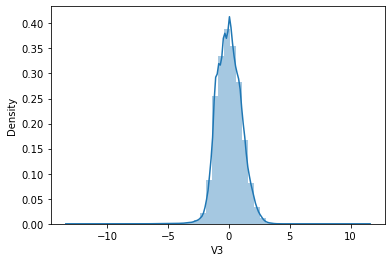

V4:0.017568381978406194


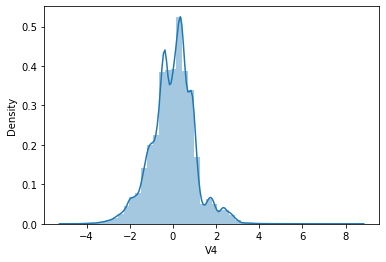

V5:-1.3091968615872762


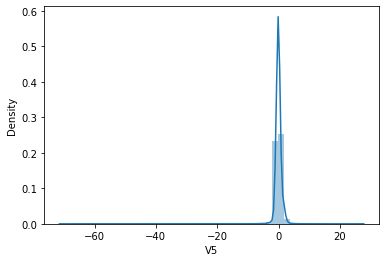

V6:-1.8861032944149545


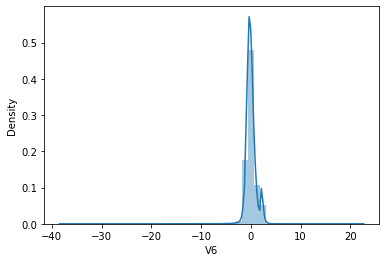

V7:2.571980495274454


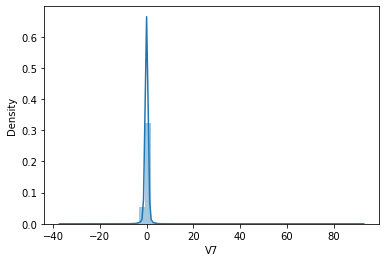

V8:2.250722927867162


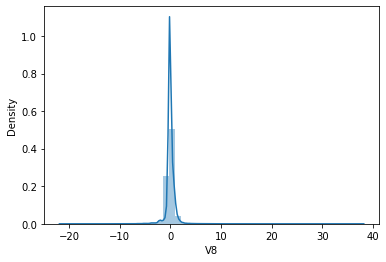

V9:-0.04922693834762793


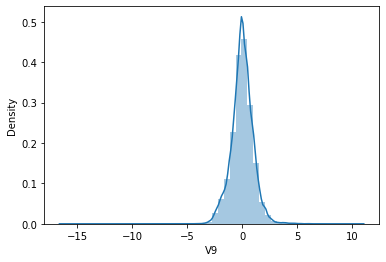

V10:-1.307621956564347


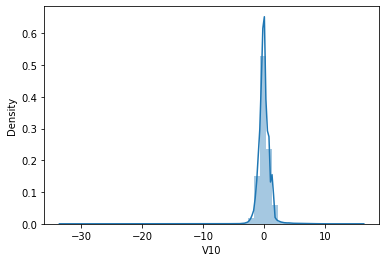

V11:0.055852425171183516


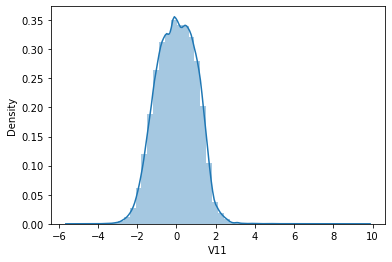

V12:0.13894012193911462


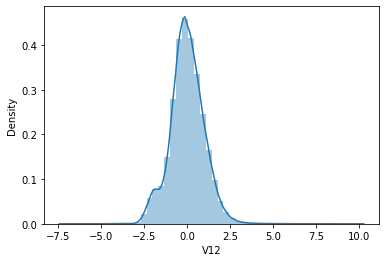

V13:0.006736812328854392


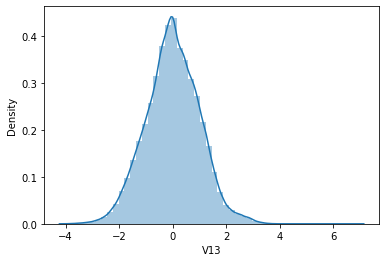

V14:0.08443670647844674


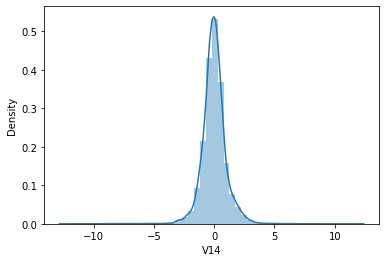

V15:0.014928223000165516


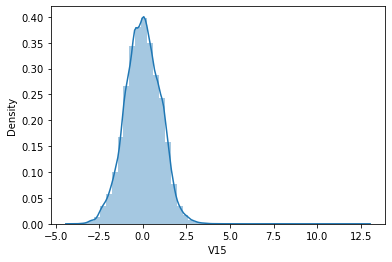

V16:0.15610680797411286


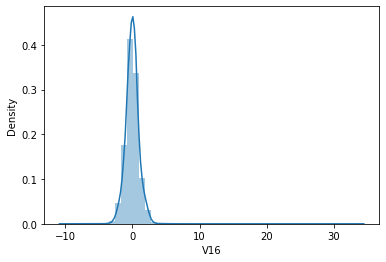

V17:-0.861925969751511


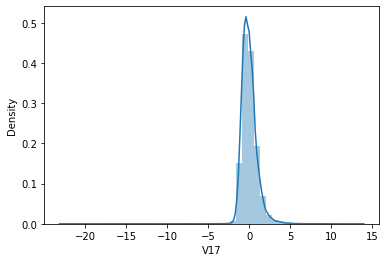

V18:-0.056154970059404966


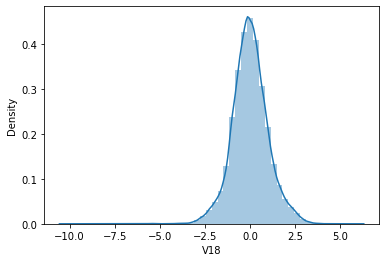

V19:0.015024030320084404


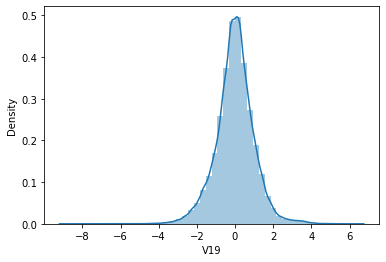

V20:-1.15857126370266


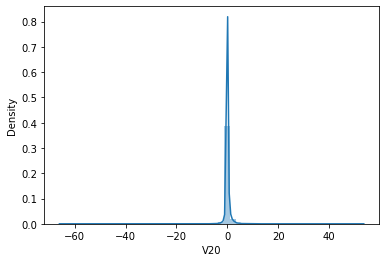

V21:-1.7039674564318883


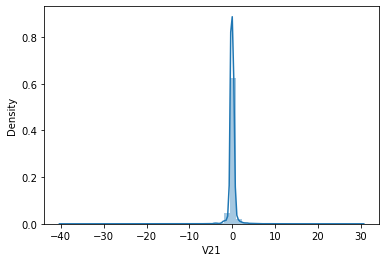

V22:-0.0217119454356683


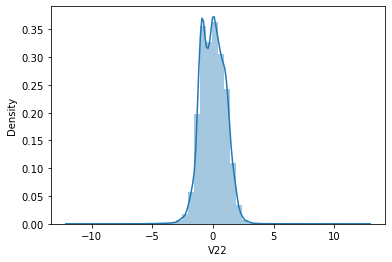

V23:-0.23125975092593012


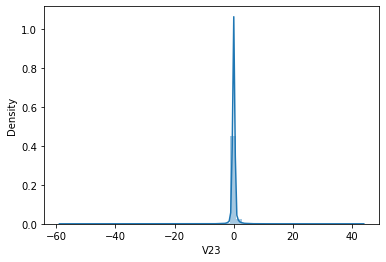

V24:0.10974576585473658


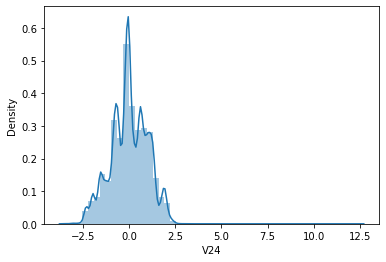

V25:0.07389272153842646


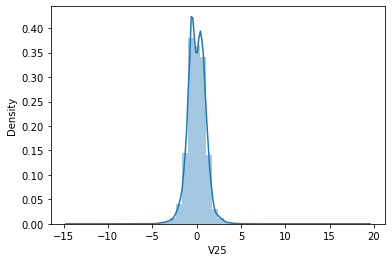

V26:-0.02414434199058706


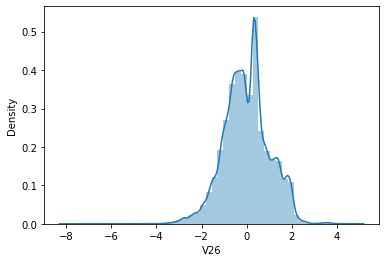

V27:3.550113537493444


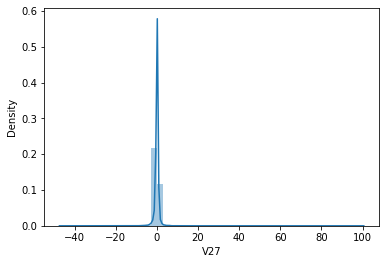

V28:0.5288426851884551


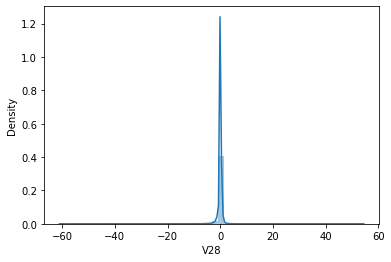

Amount:0.7076085730600884


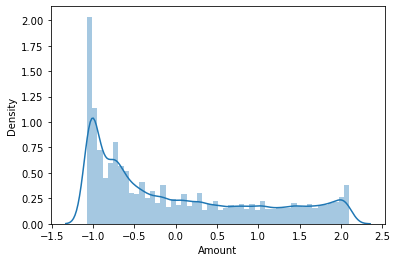

In [39]:

# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

# Transform the test set
X_test[cols] = pt.transform(X_test)
# Plotting the distribution of the variables (skewness) of all the columns
for col in cols:  
    print(col+':'+str(skew(X_train[col])))
    plt.figure()
    
    sns.distplot(X_train[col])
    plt.show()
    

## Step 5 - Undersampling

In [45]:
# instantiating the random undersampler 
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [46]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 226620, 1: 360})
New class distribution:- Counter({0: 360, 1: 360})


## Step 5 – Model Building and Training

### 5.1 Building logistic regression model

In [47]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [49]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [50]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013644,0.014998,0.003882,0.002158,0.01,{'C': 0.01},0.966815,0.970588,0.988151,0.991313,...,0.979572,0.009559,1,0.990487,0.987833,0.986322,0.987087,0.986834,0.987713,0.001470
1,0.007797,0.001141,0.003767,0.001125,0.1,{'C': 0.1},0.967586,0.965170,0.989510,0.991506,...,0.979266,0.010961,2,0.991982,0.991065,0.988131,0.988667,0.989151,0.989799,0.001473
2,0.022599,0.004190,0.006087,0.001010,1,{'C': 1},0.968744,0.953754,0.989705,0.992471,...,0.976819,0.014248,3,0.993707,0.994031,0.990471,0.991042,0.991902,0.992231,0.001417
3,0.029281,0.011059,0.004783,0.001714,10,{'C': 10},0.966236,0.941176,0.990482,0.992471,...,0.973605,0.018778,4,0.994563,0.995478,0.991714,0.992332,0.993495,0.993516,0.001385
4,0.025127,0.009091,0.005186,0.001598,100,{'C': 100},0.966236,0.932276,0.991259,0.993050,...,0.972135,0.022179,5,0.994972,0.996286,0.992208,0.992513,0.994244,0.994045,0.001526
5,0.018866,0.003545,0.002790,0.000398,1000,{'C': 1000},0.965657,0.931502,0.991259,0.993436,...,0.971393,0.022444,6,0.995153,0.996322,0.992281,0.992549,0.994304,0.994122,0.001536


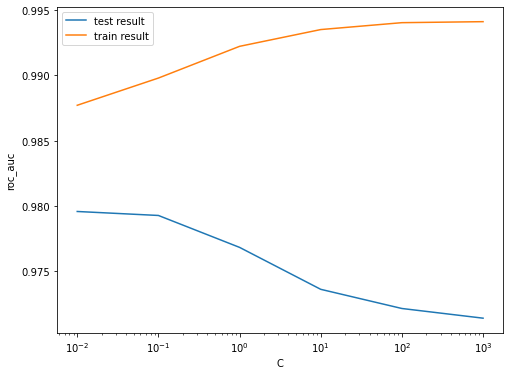

In [51]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [52]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9795715748977564 at C = 0.01


#### Logistic regression with optimal C

In [53]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)

In [54]:
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

#### Prediction on the train set

In [55]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [56]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[355   5]
 [ 29 331]]


In [57]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [58]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))


Accuracy:- 0.9527777777777777
Sensitivity:- 0.9194444444444444
Specificity:- 0.9861111111111112
F1-Score:- 0.9511494252873562


In [59]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       360
           1       0.99      0.92      0.95       360

    accuracy                           0.95       720
   macro avg       0.95      0.95      0.95       720
weighted avg       0.95      0.95      0.95       720



In [60]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [61]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9890817901234569

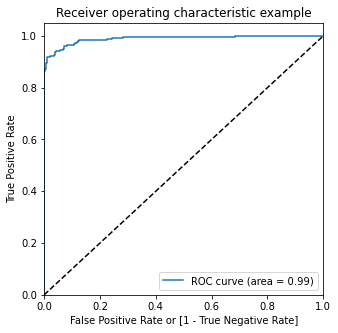

In [62]:
from sklearn import metrics
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

#### Prediction on the test set

In [63]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

In [64]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54398  2235]
 [    8   105]]


In [65]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [66]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9604729848799916
Sensitivity:- 0.9292035398230089
Specificity:- 0.9605353769003938


In [67]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56633
           1       0.04      0.93      0.09       113

    accuracy                           0.96     56746
   macro avg       0.52      0.94      0.53     56746
weighted avg       1.00      0.96      0.98     56746



In [68]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [69]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9778479009939638

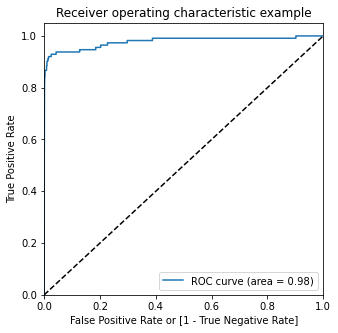

In [70]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)
